In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.preprocessing import Normalizer

# ignore warnings
import warnings; warnings.simplefilter('ignore')

# Pretty display for notebook
%matplotlib inline

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [73]:
from matplotlib.collections import LineCollection

In [2]:
# Load the data
try:
    data = pd.read_excel('Property Transaction Data More Samples.xlsx')
    data.drop(['Company','Year'], axis=1, inplace=True)
    print("Pricing data has {} data points with {} features".format(*data.shape))
except:
    print("Data not loaded. Is the dataset missing?")

Pricing data has 81 data points with 10 features


In [3]:
data.head(5)

,Layer,Limit,Retention,100% Prem,Prob. of Act.,Prob. of Exh.,100% Ceded AAL,100% Std. Dev.,Loss on Line,ROL
0,1,100000000,100000000,20000000.0,0.2884,0.1076,19045176.0,38960764.0,0.1905,0.2000
1,2,100000000,200000000,9550000.0,0.1009,0.0536,7553289.0,26038938.0,0.0755,0.0955
2,3,100000000,300000000,5700000.0,0.0531,0.0292,4106796.0,19440798.0,0.0411,0.0570
3,4,200000000,400000000,7400000.0,0.0292,0.0153,4324240.0,27903485.0,0.0216,0.0370
4,1,6000000,4000000,909000.0,0.1518,0.0493,512177.0,1568693.0,0.0854,0.1515


In [4]:
# Baseline models
new_data = data.drop(['ROL'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.2)
print('X_Train size: {} \nX_Test: {} \nY_Train: {}, \nY_Test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_Train size: (64, 9) 
X_Test: (17, 9) 
Y_Train: (64,), 
Y_Test: (17,)


In [29]:
# Setting test options
num_folds = 10
num_instances = len(X_train)
seed = 9
scoring = 'r2'

In [28]:
# Baseline performance
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

In [7]:
# Baseline Model Evaluation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Model: {}, Mean: {}, Std. Deviation: {}'.format(name, cv_results.mean(), cv_results.std()))

Model: LR, Mean: 0.7912447503784177, Std. Deviation: 0.27430265957653793
Model: Ridge, Mean: 0.302578879357296, Std. Deviation: 1.0309741161540285
Model: Lasso, Mean: -3.3201397652725406, Std. Deviation: 7.257963268189121
Model: ElasticNet, Mean: -3.3202444250230885, Std. Deviation: 7.258179358215274


In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.4, random_state=seed)
model = Ridge()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print('MSE with all features included: {}'.format(mean_squared_error(y_test, preds)))
print('Coefficient of determination R^2 with all features included: {}'.format(model.score(X_test, y_test)))

MSE with all features included: 0.0012708391230676832
Coefficient of determination R^2 with all features included: 0.7462102172908889


## Data scaling - Log Transformation

In [258]:
# Load the data
try:
    data = pd.read_excel('Property Transaction Data More Samples.xlsx')
    data.drop(['Company','Year'], axis=1, inplace=True)
    print("Pricing data has {} data points with {} features".format(*data.shape))
except:
    print("Data not loaded. Is the dataset missing?")
    
seed = 5

new_data = data.drop(['ROL'], axis=1)
log_data = np.log(new_data)
x_train, x_test, y_train, y_test = train_test_split(log_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)
print('X_Train size: {} \nX_Test: {} \nY_Train: {}, \nY_Test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

# Setting test options
num_folds = 10
num_instances = len(x_train)
scoring = 'r2'

# Baseline models
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('XGB', GradientBoostingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))

# Baseline Model Evaluation on Log transformed data
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Model: {}, Mean: {}, Std. Deviation: {}'.format(name, cv_results.mean(), cv_results.std()))


Pricing data has 81 data points with 10 features
X_Train size: (56, 9) 
X_Test: (25, 9) 
Y_Train: (56,), 
Y_Test: (25,)
Model: LR, Mean: 0.8624376163971895, Std. Deviation: 0.12029958374140101
Model: Ridge, Mean: 0.8126082495451751, Std. Deviation: 0.11589727503250552
Model: Lasso, Mean: -0.19473324064015501, Std. Deviation: 0.2739411102788659
Model: ElasticNet, Mean: -0.19473324064015501, Std. Deviation: 0.2739411102788659
Model: XGB, Mean: 0.7630290575157461, Std. Deviation: 0.21940938640999652
Model: AdaBoost, Mean: 0.8945217456238639, Std. Deviation: 0.13757553810586665


In [121]:
x_train, x_test, y_train, y_test = train_test_split(log_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print('MSE with all features included: {}'.format(mean_squared_error(y_test, preds)))
print('Coefficient of determination R^2 with all features included: {}'.format(model.score(x_test, y_test)))

MSE with all features included: 0.0008679873791285929
Coefficient of determination R^2 with all features included: 0.9069282365480025


In [54]:
y_test

array([0.034 , 0.025 , 0.0375, 0.057 , 0.27  , 0.031 , 0.0292, 0.248 ,
       0.031 , 0.31  , 0.1338, 0.12  , 0.2   , 0.1518, 0.032 , 0.05  ,
       0.1975, 0.22  , 0.0775, 0.055 , 0.0654, 0.0865, 0.051 , 0.12  ,
       0.03  , 0.0379, 0.02  , 0.0375, 0.12  , 0.115 , 0.036 , 0.0895,
       0.0732])

In [55]:
preds

array([0.03288421, 0.03271429, 0.033875  , 0.03976364, 0.275     ,
       0.03976364, 0.033875  , 0.27463333, 0.03271429, 0.1374    ,
       0.14142857, 0.0593    , 0.1925    , 0.13866   , 0.03955556,
       0.0585    , 0.19375   , 0.275     , 0.0703    , 0.0538    ,
       0.0687    , 0.0955    , 0.06322857, 0.0593    , 0.03978   ,
       0.03288421, 0.03127059, 0.03271429, 0.1154    , 0.0593    ,
       0.0333    , 0.0816125 , 0.06601429])

## Scaling - StandarScaler

In [216]:
# Load the data
try:
    data = pd.read_excel('Property Transaction Data More Samples.xlsx')
    data.drop(['Company','Year'], axis=1, inplace=True)
    print("Pricing data has {} data points with {} features".format(*data.shape))
except:
    print("Data not loaded. Is the dataset missing?")
    
seed = 7
new_data = data.drop(['ROL'], axis=1)
#log_data = np.log(new_data)
x_train, x_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)
print('X_Train size: {} \nX_Test: {} \nY_Train: {}, \nY_Test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

# Setting test options
num_folds = 10
num_instances = len(x_train)
scoring = 'r2'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', \
                  Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledRidge', \
                  Pipeline([('Scaler', StandardScaler()),('Ridge',Ridge())])))
pipelines.append(('ScaledLasso', \
                  Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso())])))
pipelines.append(('ScaledElasticNet', \
                  Pipeline([('Scaler', StandardScaler()),('ElasticNet',ElasticNet())])))
pipelines.append(('ScaledXGB', \
                  Pipeline([('Scaler', StandardScaler()),('GB',GradientBoostingRegressor())])))
pipelines.append(('ScaledAda', \
                  Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Model: {}, Mean: {}, Std. Deviation: {}'.format(name, cv_results.mean(), cv_results.std()))
    
x_train, x_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)

# create pipeline
estimators = []
estimators.append(('Standardize', StandardScaler()))
estimators.append(('algo', LinearRegression()))
model = Pipeline(estimators)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print('MSE with all features included: {}'.format(mean_squared_error(y_test, preds)))
print('Coefficient of determination R^2 with all features included: {}'.format(model.score(x_test, y_test)))
    

Pricing data has 81 data points with 10 features
X_Train size: (56, 9) 
X_Test: (25, 9) 
Y_Train: (56,), 
Y_Test: (25,)
Model: ScaledLR, Mean: 0.8189199848181647, Std. Deviation: 0.14465446464319318
Model: ScaledRidge, Mean: 0.8542101952744945, Std. Deviation: 0.10585172486937718
Model: ScaledLasso, Mean: -0.17547999546760706, Std. Deviation: 0.2646192301371518
Model: ScaledElasticNet, Mean: -0.17547999546760706, Std. Deviation: 0.2646192301371518
Model: ScaledXGB, Mean: 0.8809761840466768, Std. Deviation: 0.12166360612092139
Model: ScaledAda, Mean: 0.837541644676748, Std. Deviation: 0.16329062347656825
MSE with all features included: 0.0012094171588163517
Coefficient of determination R^2 with all features included: 0.8703177137976955


In [214]:
y_test

array([0.12  , 0.02  , 0.22  , 0.031 , 0.1975, 0.12  , 0.0865, 0.2   ,
       0.024 , 0.057 , 0.3   , 0.0375, 0.033 , 0.1338, 0.1374, 0.055 ,
       0.28  , 0.2739, 0.05  , 0.0654, 0.31  , 0.032 , 0.021 , 0.0265,
       0.0292])

In [217]:
preds

array([0.19081562, 0.0026031 , 0.15834759, 0.04570717, 0.19757297,
       0.09496744, 0.07176214, 0.19810422, 0.0227611 , 0.04925556,
       0.21423345, 0.03881555, 0.04018655, 0.15761839, 0.13973689,
       0.05445767, 0.26250571, 0.2263962 , 0.05904634, 0.06095954,
       0.21623407, 0.04446408, 0.04057394, 0.02294598, 0.02781385])

### Data Normalizer

In [46]:
# Load the data
try:
    data = pd.read_excel('Property Transaction Data More Samples.xlsx')
    data.drop(['Company','Year'], axis=1, inplace=True)
    print("Pricing data has {} data points with {} features".format(*data.shape))
except:
    print("Data not loaded. Is the dataset missing?")
    
seed = 7
new_data = data.drop(['ROL'], axis=1)
#log_data = np.log(new_data)
x_train, x_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), \
                                                    test_size=0.3, random_state=seed)
print('X_Train size: {} \nX_Test: {} \nY_Train: {}, \nY_Test: {}'.\
      format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))
print('Seed: {}'.format(seed))
print('-----------------------------------------------------------------')

# Setting test options
num_folds = 10
num_instances = len(x_train)
scoring = 'r2'

# Create pipeline for normalizing and cross-validating
pipelines = []
pipelines.append(('NormalizedLR', \
                  Pipeline([('Norm', Normalizer()),('LR',LinearRegression())])))
pipelines.append(('NormalizedRidge', \
                  Pipeline([('Norm', Normalizer()),('Ridge',Ridge())])))
pipelines.append(('NormalizedLasso', \
                  Pipeline([('Norm', Normalizer()),('Lasso',Lasso())])))
pipelines.append(('NormalizedElasticNet', \
                  Pipeline([('Norm', Normalizer()),('ElasticNet',ElasticNet())])))
pipelines.append(('NormalizedXGB', \
                  Pipeline([('Norm', Normalizer()),('GB',GradientBoostingRegressor())])))
pipelines.append(('NormalizedAda', \
                  Pipeline([('Norm', Normalizer()),('AdaBoost', AdaBoostRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Model: {}, Mean: {}, Std. Deviation: {}'.format(name, cv_results.mean(), cv_results.std()))
    
print('-----------------------------------------------------------------')
    
x_train, x_test, y_train, y_test = \
train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)

# create pipeline
estimators = []
estimators.append(('Normalize', Normalizer()))
estimators.append(('algo', GradientBoostingRegressor()))
model = Pipeline(estimators)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print('MSE with all features included: {}'.format(mean_squared_error(y_test, preds)))
print('Coefficient of determination R^2 with all features included: {}'.format(model.score(x_test, y_test)))
    

Pricing data has 81 data points with 10 features
X_Train size: (56, 9) 
X_Test: (25, 9) 
Y_Train: (56,), 
Y_Test: (25,)
Seed: 7
-----------------------------------------------------------------
Model: NormalizedLR, Mean: 0.8685303941458061, Std. Deviation: 0.26498119150785
Model: NormalizedRidge, Mean: 0.3794004695155872, Std. Deviation: 0.19470422767456563
Model: NormalizedLasso, Mean: -0.17547999546760706, Std. Deviation: 0.2646192301371518
Model: NormalizedElasticNet, Mean: -0.17547999546760706, Std. Deviation: 0.2646192301371518
Model: NormalizedXGB, Mean: 0.9124079913567644, Std. Deviation: 0.09392235981137771
Model: NormalizedAda, Mean: 0.8405232934780404, Std. Deviation: 0.14681065177665908
-----------------------------------------------------------------
MSE with all features included: 0.00015827233016823186
Coefficient of determination R^2 with all features included: 0.9830289181287373


In [ ]:
preds.

In [35]:
y_test

array([0.15  , 0.1875, 0.0654, 0.05  , 0.126 , 0.02  , 0.031 , 0.055 ,
       0.0743, 0.03  , 0.0292, 0.12  , 0.22  , 0.025 , 0.0865, 0.1515,
       0.057 , 0.078 , 0.036 , 0.034 , 0.021 , 0.0375, 0.12  , 0.0429,
       0.12  ])

In [36]:
preds

array([0.16539269, 0.20500166, 0.0692633 , 0.05165378, 0.11078077,
       0.0218089 , 0.03166208, 0.05643829, 0.07206877, 0.03073115,
       0.02612721, 0.10639463, 0.29266438, 0.03068285, 0.07546991,
       0.14753589, 0.04779342, 0.08210138, 0.0403773 , 0.03966155,
       0.01966008, 0.04138331, 0.11634809, 0.04383701, 0.11930058])

### Without data scaling

In [288]:
# Load the data
try:
    data = pd.read_excel('Property Transaction Data More Samples.xlsx')
    data.drop(['Company','Year'], axis=1, inplace=True)
    print("Pricing data has {} data points with {} features".format(*data.shape))
except:
    print("Data not loaded. Is the dataset missing?")
    
seed = 7

new_data = data.drop(['ROL'], axis=1)
#log_data = np.log(new_data)
x_train, x_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)
print('X_Train size: {} \nX_Test: {} \nY_Train: {}, \nY_Test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

# Setting test options
num_folds = 10
num_instances = len(x_train)
scoring = 'r2'

# Baseline models
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('XGB', GradientBoostingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))

# Baseline Model Evaluation on raw data
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('Model: {}, Mean: {}, Std. Deviation: {}'.format(name, cv_results.mean(), cv_results.std()))
    

# Testing score
x_train, x_test, y_train, y_test = train_test_split(new_data, data['ROL'].values.reshape(-1), test_size=0.3, random_state=seed)
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print('MSE with all features included: {}'.format(mean_squared_error(y_test, preds)))
print('Coefficient of determination R^2 with all features included: {}'.format(model.score(x_test, y_test)))


Pricing data has 81 data points with 10 features
X_Train size: (56, 9) 
X_Test: (25, 9) 
Y_Train: (56,), 
Y_Test: (25,)
Model: LR, Mean: 0.8189199854171163, Std. Deviation: 0.1446544638442958
Model: Ridge, Mean: 0.5395646344316498, Std. Deviation: 0.6213315765576694
Model: Lasso, Mean: 0.12739986148306195, Std. Deviation: 0.2198208678703035
Model: ElasticNet, Mean: 0.12737412639067744, Std. Deviation: 0.21985666683522337
Model: XGB, Mean: 0.8988449160369637, Std. Deviation: 0.10653528770367549
Model: AdaBoost, Mean: 0.8380085430506128, Std. Deviation: 0.1587764143698689
MSE with all features included: 0.001209417162692297
Coefficient of determination R^2 with all features included: 0.8703177133820892


In [283]:
y_test

array([0.12  , 0.02  , 0.22  , 0.031 , 0.1975, 0.12  , 0.0865, 0.2   ,
       0.024 , 0.057 , 0.3   , 0.0375, 0.033 , 0.1338, 0.1374, 0.055 ,
       0.28  , 0.2739, 0.05  , 0.0654, 0.31  , 0.032 , 0.021 , 0.0265,
       0.0292])

In [284]:
preds

array([0.16351959, 0.02139001, 0.26918003, 0.03528205, 0.20028015,
       0.10491833, 0.09134085, 0.19486024, 0.02507591, 0.06654229,
       0.2936353 , 0.03746351, 0.03594925, 0.12248637, 0.19209917,
       0.07066314, 0.27431027, 0.24485433, 0.04929292, 0.06108283,
       0.2936353 , 0.03568876, 0.02689948, 0.02418635, 0.03387977])

In [289]:
dict_df = {'test': y_test, 'preds': preds}

In [291]:
df = pd.DataFrame(dict_df, columns=dict_df.keys())

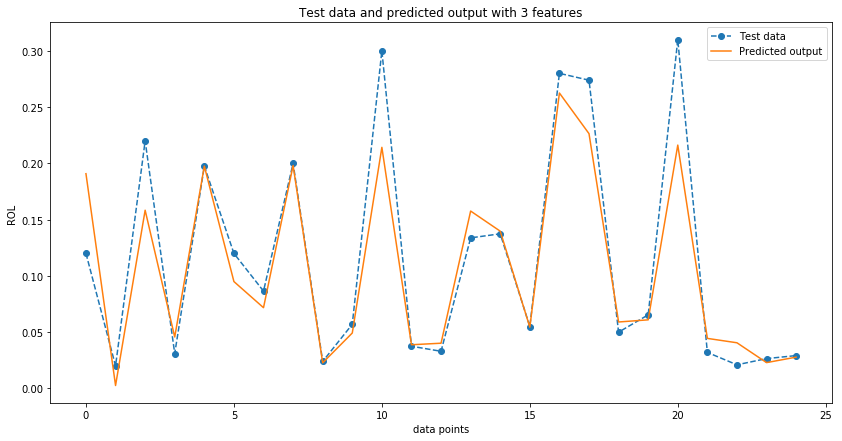

In [293]:
dict_df = {'test': y_test, 'preds': preds}
df = pd.DataFrame(dict_df, columns=dict_df.keys())
data_points = df.index.values
plt.figure(figsize=(14,7))
plt.plot(data_points, 'test', data=df, linestyle='dashed', label='Test data', marker="o")
plt.plot(data_points, 'preds', data=df, label='Predicted output')
plt.xlabel('data points')
plt.ylabel('ROL')
plt.title('Test data and predicted output with 3 features')
plt.legend(loc='upper right')

In [371]:
Raw = pd.read_excel('RawData.xlsx')

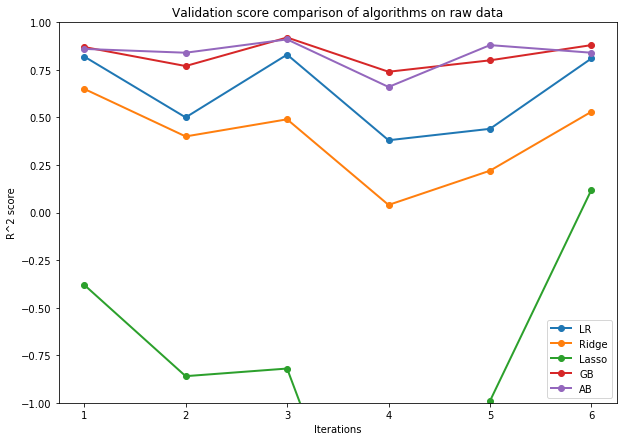

In [372]:
plt.figure(figsize=(10,7))
plt.plot('Iteration', 'LR', data=Raw, marker='o', linewidth = 2)
plt.plot('Iteration', 'Ridge', data=Raw, marker='o', linewidth = 2)
plt.plot('Iteration', 'Lasso', data=Raw, marker='o', linewidth = 2)
plt.plot('Iteration', 'GB', data=Raw, marker='o', linewidth = 2)
plt.plot('Iteration', 'AB', data=Raw, marker='o', linewidth = 2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score comparison of algorithms on raw data')
plt.ylim((-1,1))
plt.legend()

In [373]:
logTransform = pd.read_excel('LogTransformedData.xlsx')

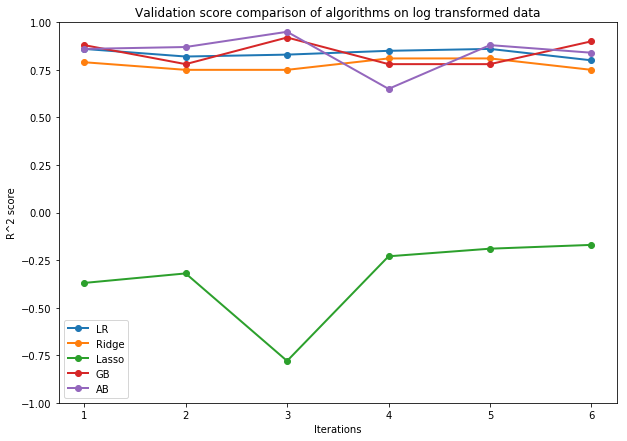

In [374]:
plt.figure(figsize=(10,7))
plt.plot('Iteration','LR',data=logTransform,marker='o',linewidth=2)
plt.plot('Iteration','Ridge',data=logTransform,marker='o',linewidth=2)
plt.plot('Iteration','Lasso',data=logTransform,marker='o',linewidth=2)
plt.plot('Iteration','GB',data=logTransform,marker='o',linewidth=2)
plt.plot('Iteration','AB',data=logTransform,marker='o',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score comparison of algorithms on log transformed data')
plt.ylim((-1,1))
plt.legend()

In [375]:
standardized = pd.read_excel('StandardizedData.xlsx')

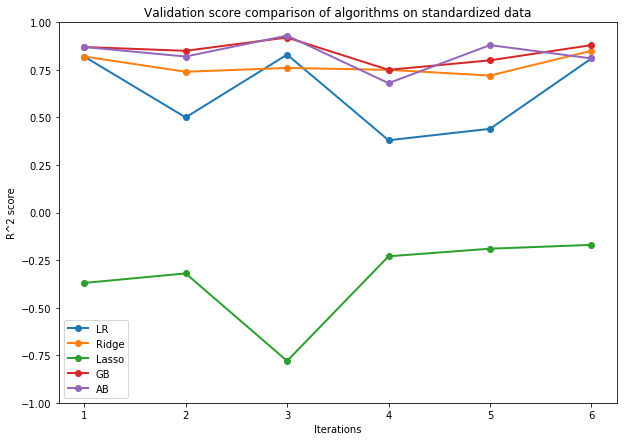

In [376]:
plt.figure(figsize=(10,7))
plt.plot('Iteration','LR',data=standardized,marker='o',linewidth=2)
plt.plot('Iteration','Ridge',data=standardized,marker='o',linewidth=2)
plt.plot('Iteration','Lasso',data=standardized,marker='o',linewidth=2)
plt.plot('Iteration','GB',data=standardized,marker='o',linewidth=2)
plt.plot('Iteration','AB',data=standardized,marker='o',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score comparison of algorithms on standardized data')
plt.ylim((-1,1))
plt.legend()

### Validation Score and Test Score comparison

In [377]:
ValTestRaw = pd.read_excel('ValTestRawData.xlsx')

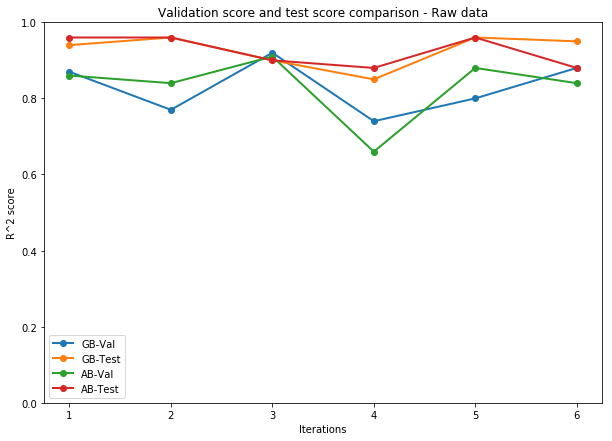

In [378]:
plt.figure(figsize=(10,7))
#plt.yticks((0, 1, 0.1))
plt.plot('Iteration','GB-Val',data=ValTestRaw,marker='o',linewidth=2)
plt.plot('Iteration','GB-Test',data=ValTestRaw,marker='o',linewidth=2)
plt.plot('Iteration','AB-Val',data=ValTestRaw,marker='o',linewidth=2)
plt.plot('Iteration','AB-Test',data=ValTestRaw,marker='o',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score and test score comparison - Raw data')
plt.ylim((0,1))
plt.legend()

In [379]:
ValTestLog = pd.read_excel('ValTestLogData.xlsx')

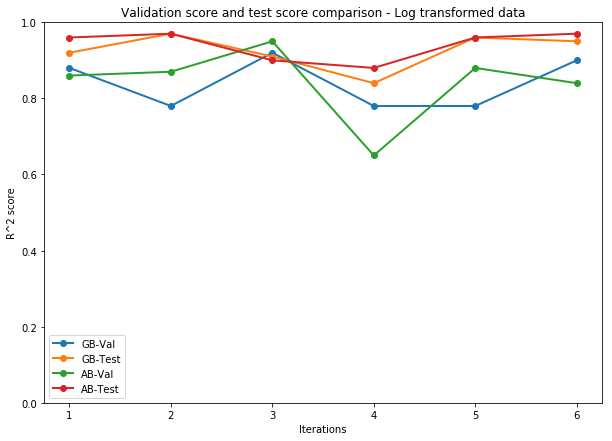

In [380]:
plt.figure(figsize=(10,7))
#plt.yticks((0, 1, 0.1))
plt.plot('Iteration','GB-Val',data=ValTestLog,marker='o',linewidth=2)
plt.plot('Iteration','GB-Test',data=ValTestLog,marker='o',linewidth=2)
plt.plot('Iteration','AB-Val',data=ValTestLog,marker='o',linewidth=2)
plt.plot('Iteration','AB-Test',data=ValTestLog,marker='o',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score and test score comparison - Log transformed data')
plt.ylim((0,1))
plt.legend()

In [381]:
ValTestStd = pd.read_excel('ValTestStdData.xlsx')

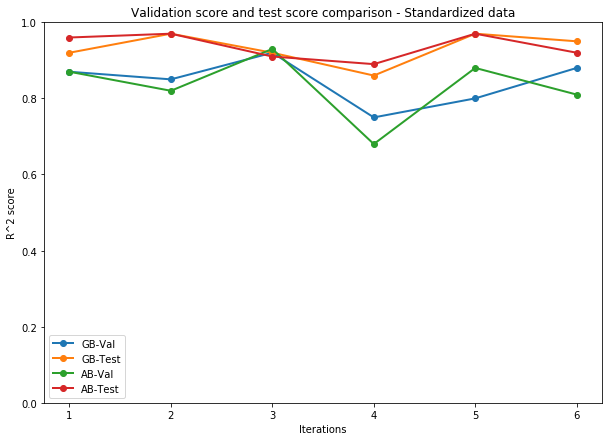

In [382]:
plt.figure(figsize=(10,7))
#plt.yticks((0, 1, 0.1))
plt.plot('Iteration','GB-Val',data=ValTestStd,marker='o',linewidth=2)
plt.plot('Iteration','GB-Test',data=ValTestStd,marker='o',linewidth=2)
plt.plot('Iteration','AB-Val',data=ValTestStd,marker='o',linewidth=2)
plt.plot('Iteration','AB-Test',data=ValTestStd,marker='o',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('R^2 score')
plt.title('Validation score and test score comparison - Standardized data')
plt.ylim((0,1))
plt.legend()